<a href="https://colab.research.google.com/github/Juanje932/Diplomado-IA/blob/master/DeteccionManzana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detección de strawberries

link del dataset: https://universe.roboflow.com/saruta-nonthasiriwat-sr2y9/strawberry-tyqqb/dataset/2

Link interesante, datos de paga:  https://www.kaggle.com/datasets/trainingdatapro/ripe-strawberries-detection/data

Mas imagenes, no revisadas: https://universe.roboflow.com/cs2/farm-detect9/dataset/3

In [1]:
# Uso de la API de roboflow
%pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


## Descargar el dataset


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="fDfY37GxkyGoaJ1AfIFM")
project = rf.workspace("juanjesus").project("manzanas-clases")
version = project.version(1)
dataset = version.download("yolov5")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Manzanas-clases-1 in yolov5pytorch:: 100%|██████████| 1580/1580 [00:00<00:00, 6671.05it/s]


## Visualización de los datos

In [3]:
# Codigo utilizable como libreria
import os
import yaml
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import shutil

def load_yaml_config(yaml_path):
    """
    Carga un archivo de configuración YAML.

    Args:
        yaml_path (str): Ruta al archivo YAML.

    Returns:
        dict: Contenido del YAML parseado.
    """
    with open(yaml_path, 'r') as file:
        return yaml.safe_load(file)

def count_classes(labels_dir):
    """
    Cuenta las ocurrencias de cada clase en los archivos de etiquetas de un directorio dado.

    Args:
        labels_dir (str): Ruta al directorio que contiene los archivos de etiquetas.

    Returns:
        Counter: Un objeto Counter con los conteos de clases.
    """
    class_counter = Counter()
    for label_file in os.listdir(labels_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(labels_dir, label_file), 'r') as file:
                for line in file:
                    class_id = int(line.split()[0])
                    class_counter[class_id] += 1
    return class_counter

def analyze_class_balance(config_path):
    """
    Analiza el balance de clases en el conjunto de datos según lo especificado en el archivo de configuración.

    Args:
        config_path (str): Ruta al archivo de configuración YAML.

    Returns:
        pd.DataFrame: DataFrame que contiene los conteos de clases para cada división del conjunto de datos.
    """
    config = load_yaml_config(config_path)
    classes = config['names']
    datasets = ['train', 'valid', 'test']
    base_dir = os.path.dirname(config_path)

    results = {}
    for dataset in datasets:
        labels_dir = os.path.join(base_dir, dataset, 'labels')
        if os.path.exists(labels_dir):
            results[dataset] = count_classes(labels_dir)
        else:
            print(f"Advertencia: El directorio '{labels_dir}' no existe. Saltando el conjunto de datos {dataset}.")
            results[dataset] = Counter()

    # Creación del DataFrame
    df = pd.DataFrame({dataset: [results[dataset].get(i, 0) for i in range(len(classes))] for dataset in datasets}, index=classes)

    return df


def plot_class_balance(df):
    """
    Genera un gráfico de barras para visualizar el balance de clases en los diferentes conjuntos de datos.

    Args:
        df (pd.DataFrame): DataFrame que contiene los conteos de clases para cada división del conjunto de datos.
    """
    ax = df.plot(kind='bar', figsize=(10, 6), width=0.8)
    plt.title('Balance de Clases en los Conjuntos de Datos')
    plt.xlabel('Clases')
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)
    plt.legend(title='Conjuntos de Datos')
    plt.tight_layout()
    plt.show()


def remove_directory_if_exists(directory_path):
    """
    Elimina un directorio si existe.

    Args:
        directory_path (str): La ruta del directorio a eliminar.
    """
    if os.path.exists(directory_path):
        shutil.rmtree(directory_path)
        print(f"Directorio '{directory_path}' eliminado exitosamente.")
    else:
        print(f"Directorio '{directory_path}' no existe.")

**NOTA: Es necesario que el dataset se encuentre en el siguiente formato.**


```plaintext
strawberry-2
├── test
├── train
├── valid
└── data.yaml
```



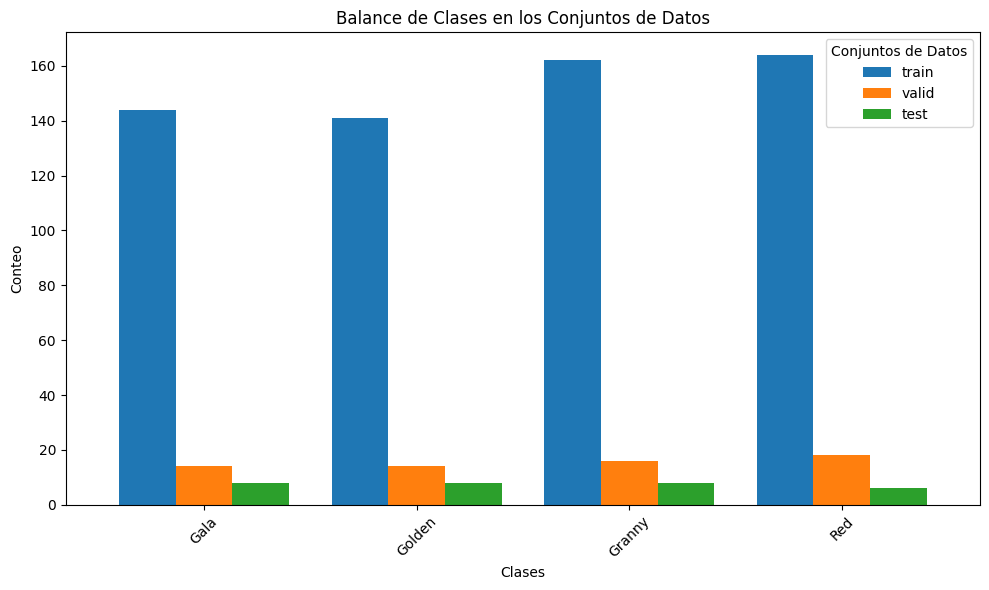

        train  valid  test
Gala      144     14     8
Golden    141     14     8
Granny    162     16     8
Red       164     18     6


In [4]:
class_balance_df = analyze_class_balance(r'/content/Manzanas-clases-1/data.yaml')
plot_class_balance(class_balance_df)
print(class_balance_df)

# Instalación de Ultralytics

In [5]:
%pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [6]:
import yaml

# Definir el contenido del archivo YAML
data = {
    'names': ['Gala', 'Golden', 'Granny','Red'],
    'nc': 4,
    'test': '/content/Manzanas-clases-1/test',
    'train': '/content/Manzanas-clases-1/train',
    'val': '/content/Manzanas-clases-1/valid'
}

path = r'/content/Manzanas-clases-1/data.yaml'

# Escribir el contenido en un archivo YAML
with open(path , 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("Archivo data.yaml creado exitosamente.")


Archivo data.yaml creado exitosamente.


Descripción de la Arquitectura: https://docs.ultralytics.com/yolov5/tutorials/architecture_description/

In [ ]:
remove_directory_if_exists(r'D:\Diplomado-IA\Modulo_5_extendido\Proyecto_1\runs')

In [7]:
from ultralytics import YOLO

model = YOLO("yolov5nu.pt")  # Entrenamiento con pesos pre-entrenados

#model = YOLO("yolov5s.yaml") # Entrenamiento desde cero, revisar los modelos en https://docs.ultralytics.com/models/yolov5/#supported-tasks-and-modes
# NOTA: Yolov5su  has moved towards an anchor-free, objectness-free approach. Sin embargo los detalles arquitectonicos son no cambian, solo el cabezal de detección

model.train(
    data=r"/content/Manzanas-clases-1/data.yaml",
    task="detect",
    mode='train',
    epochs=50,          # Número de épocas de entrenamiento
    patience=100,       # Paciencia para el early stopping
    batch=16,           # Tamaño del batch
    imgsz=640,          # Tamaño de la imagen
    save=True,          # Guardar el modelo después de entrenar
    cache=False,        # Usar caché de datos
    device=None,        # Dispositivo para el entrenamiento (None para auto-detectar)
    workers=8,          # Número de workers para el data loading
    pretrained=True,    # Usar pesos pre-entrenados
    optimizer='auto',   # Optimizador
    verbose=True,       # Imprimir información durante el entrenamiento
    seed=0,             # Semilla para la reproducibilidad
    deterministic=True, # Asegurar entrenamiento determinista
    amp=True,           # Mixed precision training
    val=True,           # Validar después de cada época
    split='val',        # División para validación
    iou=0.7,            # Umbral de IoU
    max_det=300,        # Máximo número de detecciones por imagen
    lr0=0.01,           # Tasa de aprendizaje inicial
    lrf=0.01,           # Factor de reducción de la tasa de aprendizaje
    momentum=0.937,     # Momento para SGD
    weight_decay=0.0005,# Decaimiento de peso
    warmup_epochs=3.0,  # Número de épocas de calentamiento
    warmup_momentum=0.8,# Momento durante el calentamiento
    warmup_bias_lr=0.1, # Tasa de aprendizaje para el sesgo durante el calentamiento
    box=7.5,            # Pérdida de la caja
    cls=0.5,            # Pérdida de la clase
    dfl=1.5,            # Pérdida de distribución focal
    mosaic=1.0,         # Probabilidad de aplicar la técnica de mosaic
    auto_augment='randaugment', # Tipo de aumento automático
    erasing=0.4,        # Probabilidad de borrado aleatorio
    save_dir='runs/detect/train', # Directorio para guardar los resultados
    name = 'exp-YOLOV5N'
)


100%|██████████| 5.31M/5.31M [00:00<00:00, 334MB/s]


Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov5nu.pt, data=/content/Manzanas-clases-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=exp-YOLOV5N, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

100%|██████████| 755k/755k [00:00<00:00, 117MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1760  ultralytics.nn.modules.conv.Conv             [3, 16, 6, 2, 2]              
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      4800  ultralytics.nn.modules.block.C3              [32, 32, 1]                   
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     29184  ultralytics.nn.modules.block.C3              [64, 64, 2]                   
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  3    156928  ultralytics.nn.modules.block.C3              [128, 128, 3]                 
  7                  -1  1    295424  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 399MB/s]


AMP: checks passed ✅


train: Scanning /content/Manzanas-clases-1/train/labels... 684 images, 73 backgrounds, 0 corrupt: 100%|██████████| 684/684 [00:00<00:00, 1446.04it/s]

train: New cache created: /content/Manzanas-clases-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Manzanas-clases-1/valid/labels... 68 images, 6 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<00:00, 1283.34it/s]

val: New cache created: /content/Manzanas-clases-1/valid/labels.cache


Plotting labels to runs/detect/exp-YOLOV5N/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/exp-YOLOV5N
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.16G      1.037      3.144       1.33         18        640: 100%|██████████| 43/43 [00:07<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]

                   all         68         62      0.557      0.178      0.352       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.98G     0.9843      2.305      1.241         20        640: 100%|██████████| 43/43 [00:04<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.52it/s]


                   all         68         62      0.312      0.518      0.426      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.98G      1.002      2.111      1.257         15        640: 100%|██████████| 43/43 [00:04<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]


                   all         68         62      0.488      0.538      0.548      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.98G     0.9642      1.746      1.235         18        640: 100%|██████████| 43/43 [00:04<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.59it/s]

                   all         68         62      0.831      0.403      0.568      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.98G      1.025      1.722      1.255         19        640: 100%|██████████| 43/43 [00:04<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.77it/s]


                   all         68         62      0.419      0.712      0.616      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.98G     0.9565      1.534      1.199         22        640: 100%|██████████| 43/43 [00:04<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.31it/s]

                   all         68         62      0.849      0.815      0.878      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.98G     0.9754      1.442      1.203         20        640: 100%|██████████| 43/43 [00:04<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.25it/s]

                   all         68         62      0.843      0.815      0.854      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.97G     0.9124      1.334      1.191         27        640: 100%|██████████| 43/43 [00:04<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]

                   all         68         62      0.796       0.84      0.887      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.97G     0.8519      1.218       1.14         23        640: 100%|██████████| 43/43 [00:04<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.32it/s]

                   all         68         62      0.885      0.776       0.86      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.98G     0.8811      1.146      1.162         20        640: 100%|██████████| 43/43 [00:04<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.27it/s]

                   all         68         62      0.837      0.849      0.874      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.97G     0.8682      1.089      1.155         16        640: 100%|██████████| 43/43 [00:04<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.08it/s]

                   all         68         62      0.912      0.849      0.899      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.97G     0.8279      1.011      1.132         15        640: 100%|██████████| 43/43 [00:04<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.10it/s]

                   all         68         62       0.83      0.827      0.863      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.97G     0.8082     0.9528      1.115         20        640: 100%|██████████| 43/43 [00:04<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.72it/s]

                   all         68         62       0.91      0.853      0.881      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.98G      0.833     0.9538       1.12         17        640: 100%|██████████| 43/43 [00:04<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.96it/s]

                   all         68         62      0.942      0.784      0.892      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.97G     0.8301       0.92      1.116         18        640: 100%|██████████| 43/43 [00:04<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.68it/s]

                   all         68         62       0.94      0.863      0.911      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.97G     0.7982     0.8972      1.103         22        640: 100%|██████████| 43/43 [00:04<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.46it/s]

                   all         68         62      0.901      0.864      0.914      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.97G     0.7586     0.8326      1.079         22        640: 100%|██████████| 43/43 [00:04<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.67it/s]

                   all         68         62      0.911      0.831      0.879       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.98G     0.7781     0.8507      1.085         19        640: 100%|██████████| 43/43 [00:04<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.59it/s]

                   all         68         62      0.902      0.866       0.88      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.97G     0.7701     0.7831      1.084         23        640: 100%|██████████| 43/43 [00:04<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.21it/s]

                   all         68         62      0.892      0.833      0.843      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.97G     0.7614     0.8105      1.089         23        640: 100%|██████████| 43/43 [00:04<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.67it/s]

                   all         68         62      0.943      0.879      0.901      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.97G      0.761      0.801      1.083         21        640: 100%|██████████| 43/43 [00:04<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.07it/s]

                   all         68         62      0.969      0.871      0.907      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.98G      0.728     0.7366      1.076         23        640: 100%|██████████| 43/43 [00:04<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.83it/s]

                   all         68         62      0.962      0.852      0.904      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.97G      0.683     0.7078      1.061         32        640: 100%|██████████| 43/43 [00:04<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.33it/s]

                   all         68         62      0.951      0.917      0.921      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.97G     0.7092     0.7063      1.054         17        640: 100%|██████████| 43/43 [00:04<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.44it/s]

                   all         68         62      0.973      0.906      0.918      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.97G     0.6913     0.6912      1.046         22        640: 100%|██████████| 43/43 [00:04<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.71it/s]

                   all         68         62       0.88       0.81      0.889      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.98G     0.7149     0.7025      1.066         23        640: 100%|██████████| 43/43 [00:04<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.03it/s]

                   all         68         62      0.939      0.907      0.911      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.97G      0.714     0.6719      1.051         20        640: 100%|██████████| 43/43 [00:04<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.83it/s]

                   all         68         62      0.895      0.909      0.909      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.97G     0.6894     0.6548      1.045         20        640: 100%|██████████| 43/43 [00:04<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.52it/s]

                   all         68         62      0.954      0.895      0.921      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.97G     0.6669      0.612      1.025         17        640: 100%|██████████| 43/43 [00:04<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.43it/s]

                   all         68         62      0.964      0.902      0.918      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.98G       0.69     0.6209      1.059         12        640: 100%|██████████| 43/43 [00:04<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.74it/s]

                   all         68         62      0.911      0.891      0.903      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.97G     0.6645      0.616      1.034         25        640: 100%|██████████| 43/43 [00:04<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.97it/s]

                   all         68         62      0.958      0.897      0.911      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.97G     0.6808     0.6401       1.05         29        640: 100%|██████████| 43/43 [00:04<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.93it/s]

                   all         68         62      0.942      0.864      0.912      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.97G     0.6523     0.6168      1.031         18        640: 100%|██████████| 43/43 [00:04<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.89it/s]

                   all         68         62      0.953      0.907      0.916      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.98G     0.6434     0.5899      1.023         17        640: 100%|██████████| 43/43 [00:04<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.53it/s]

                   all         68         62      0.976      0.904       0.92      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.97G     0.6301     0.5689      1.021         19        640: 100%|██████████| 43/43 [00:04<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.50it/s]

                   all         68         62      0.955       0.87      0.912      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.97G     0.6308     0.5697      1.019         20        640: 100%|██████████| 43/43 [00:04<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.77it/s]

                   all         68         62      0.958      0.909      0.915       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.97G     0.6148     0.5423      1.022         17        640: 100%|██████████| 43/43 [00:04<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.13it/s]


                   all         68         62      0.945      0.896      0.915      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.98G     0.6131     0.5581      1.009         22        640: 100%|██████████| 43/43 [00:04<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.84it/s]

                   all         68         62      0.899      0.883      0.911      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.97G     0.6011     0.5586      1.009         29        640: 100%|██████████| 43/43 [00:04<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.65it/s]

                   all         68         62      0.988      0.897      0.922       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.97G     0.5981     0.5529      1.004         18        640: 100%|██████████| 43/43 [00:04<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.95it/s]


                   all         68         62      0.926      0.907      0.921      0.856
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.98G     0.6062     0.5119      1.046          9        640: 100%|██████████| 43/43 [00:05<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.39it/s]

                   all         68         62      0.955      0.909      0.916      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.98G     0.6051     0.4801      1.047         10        640: 100%|██████████| 43/43 [00:04<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.73it/s]

                   all         68         62      0.987      0.902      0.925      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.98G      0.577     0.4675      1.031         11        640: 100%|██████████| 43/43 [00:04<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.41it/s]

                   all         68         62      0.954      0.909       0.91      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.98G     0.5669     0.4462      1.019          9        640: 100%|██████████| 43/43 [00:04<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.85it/s]

                   all         68         62      0.965      0.902      0.918      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.98G     0.5633     0.4565      1.018         10        640: 100%|██████████| 43/43 [00:04<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.63it/s]

                   all         68         62       0.97      0.905       0.91       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.98G     0.5693     0.4573       1.02         12        640: 100%|██████████| 43/43 [00:04<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.40it/s]

                   all         68         62       0.97      0.906      0.932      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.98G     0.5483     0.4431      1.012         10        640: 100%|██████████| 43/43 [00:04<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.40it/s]

                   all         68         62      0.972      0.908      0.932      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.98G     0.5376     0.4232     0.9992          8        640: 100%|██████████| 43/43 [00:04<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.56it/s]

                   all         68         62      0.971       0.92      0.926      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.97G     0.5054     0.3842     0.9981         11        640: 100%|██████████| 43/43 [00:04<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.66it/s]

                   all         68         62      0.978      0.912      0.932      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.98G     0.4962      0.379     0.9729          8        640: 100%|██████████| 43/43 [00:04<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.52it/s]

                   all         68         62      0.978      0.914      0.935      0.861



50 epochs completed in 0.075 hours.
Optimizer stripped from runs/detect/exp-YOLOV5N/weights/last.pt, 5.3MB
Optimizer stripped from runs/detect/exp-YOLOV5N/weights/best.pt, 5.3MB

Validating runs/detect/exp-YOLOV5N/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv5n summary (fused): 193 layers, 2,503,724 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.94it/s]


                   all         68         62      0.978      0.914      0.934      0.861
                  Gala         14         14      0.995      0.857       0.91      0.793
                Golden         14         14      0.989          1      0.995      0.955
                Granny         16         16      0.994          1      0.995      0.977
                   Red         18         18      0.935      0.798      0.837      0.721
Speed: 0.2ms preprocess, 1.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/exp-YOLOV5N


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aaadc0b28f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

## Evaluación del modelo entrenado

https://docs.ultralytics.com/modes/val/

In [8]:
metrics = model.val(imgsz = 640, split = 'test', plots = True, name = 'Metrics-test-exp-YOLOV5N')

Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv5n summary (fused): 193 layers, 2,503,724 parameters, 0 gradients, 7.1 GFLOPs


val: Scanning /content/Manzanas-clases-1/test/labels... 32 images, 2 backgrounds, 0 corrupt: 100%|██████████| 32/32 [00:00<00:00, 1427.88it/s]

val: New cache created: /content/Manzanas-clases-1/test/labels.cache



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]


                   all         32         30      0.978       0.91      0.965      0.887
                  Gala          8          8      0.993          1      0.995      0.938
                Golden          8          8      0.936       0.75      0.874      0.744
                Granny          8          8          1      0.891      0.995      0.953
                   Red          6          6      0.984          1      0.995      0.912
Speed: 0.2ms preprocess, 11.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/Metrics-test-exp-YOLOV5N


In [9]:
metrics = model.val(imgsz = 640, split = 'val', plots = True, name = 'Metrics-val-exp-YOLOV5N')

Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)


val: Scanning /content/Manzanas-clases-1/valid/labels.cache... 68 images, 6 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.23it/s]


                   all         68         62      0.978      0.914      0.934      0.862
                  Gala         14         14      0.995      0.857       0.91      0.793
                Golden         14         14      0.989          1      0.995      0.955
                Granny         16         16      0.994          1      0.995      0.977
                   Red         18         18      0.935      0.799      0.837      0.721
Speed: 0.2ms preprocess, 9.6ms inference, 0.0ms loss, 14.7ms postprocess per image
Results saved to runs/detect/Metrics-val-exp-YOLOV5N


In [10]:
metrics = model.val(imgsz = 640, split = 'train', plots = True, name = 'Metrics-train-exp-YOLOV5N')

Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)


val: Scanning /content/Manzanas-clases-1/train/labels.cache... 684 images, 73 backgrounds, 0 corrupt: 100%|██████████| 684/684 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:05<00:00,  8.47it/s]


                   all        684        611      0.992      0.952      0.978      0.905
                  Gala        144        144          1      0.995      0.995      0.933
                Golden        141        141      0.998      0.979      0.994      0.919
                Granny        162        162      0.999          1      0.995      0.936
                   Red        164        164      0.972      0.835      0.929      0.831
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/Metrics-train-exp-YOLOV5N


# Predicciones

In [11]:
from ultralytics import YOLO
model = YOLO(r"/content/runs/detect/exp-YOLOV5N/weights/best.pt")

In [12]:
model.predict(r"/content/Manzanas-clases-1/test/images/Gala-s-6-_png.rf.2ddd212561fc365b60df9f2bf901d896.jpg", save=True, imgsz=640, conf=0.36)


image 1/1 /content/Manzanas-clases-1/test/images/Gala-s-6-_png.rf.2ddd212561fc365b60df9f2bf901d896.jpg: 640x640 1 Gala, 10.1ms
Speed: 2.7ms preprocess, 10.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Gala', 1: 'Golden', 2: 'Granny', 3: 'Red'}
 obb: None
 orig_img: array([[[158, 158, 158],
         [163, 163, 163],
         [168, 168, 168],
         ...,
         [236, 236, 236],
         [239, 239, 239],
         [239, 239, 239]],
 
        [[161, 161, 161],
         [167, 167, 167],
         [172, 172, 172],
         ...,
         [233, 233, 233],
         [235, 235, 235],
         [235, 235, 235]],
 
        [[166, 166, 166],
         [172, 172, 172],
         [177, 177, 177],
         ...,
         [229, 229, 229],
         [231, 231, 231],
         [232, 232, 232]],
 
        ...,
 
        [[142, 142, 142],
         [140, 140, 140],
         [136, 136, 136],
         ...,
         [112, 112, 112],
         [110, 110, 110],
         [109, 109, 109]],
 
        [[135, 135, 135],
         [133, 133, 133],
         [129, 129, 129]

In [13]:
model.predict(r"/content/Manzanas-clases-1/test/images", save=True, imgsz=640, conf=0.35, save_txt = True, save_conf = False)


image 1/32 /content/Manzanas-clases-1/test/images/Gala-s-6-_png.rf.2ddd212561fc365b60df9f2bf901d896.jpg: 640x640 1 Gala, 9.9ms
image 2/32 /content/Manzanas-clases-1/test/images/Gala-s-6-_png.rf.8129b37fd3984e25aa229699ec685449.jpg: 640x640 1 Gala, 8.5ms
image 3/32 /content/Manzanas-clases-1/test/images/Gala-s-6-_png.rf.86e5f40968115b6f9f24b80848690e2c.jpg: 640x640 1 Gala, 8.1ms
image 4/32 /content/Manzanas-clases-1/test/images/Gala-s-6-_png.rf.a57c2e370a44c6a4e93b5b872e2b5af0.jpg: 640x640 1 Gala, 9.9ms
image 5/32 /content/Manzanas-clases-1/test/images/Gala-s-8-_png.rf.0a042eec877411fdc72a88c29a262320.jpg: 640x640 1 Gala, 7.9ms
image 6/32 /content/Manzanas-clases-1/test/images/Gala-s-8-_png.rf.1e2cc253c3065eb2d741a39d33094d35.jpg: 640x640 1 Gala, 7.8ms
image 7/32 /content/Manzanas-clases-1/test/images/Gala-s-8-_png.rf.834ee0c55e9c326c22cbcb6c139e6cb6.jpg: 640x640 1 Gala, 7.8ms
image 8/32 /content/Manzanas-clases-1/test/images/Gala-s-8-_png.rf.d1b96e412c898ded9dc1185c10f4bed5.jpg: 640x6

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Gala', 1: 'Golden', 2: 'Granny', 3: 'Red'}
 obb: None
 orig_img: array([[[158, 158, 158],
         [163, 163, 163],
         [168, 168, 168],
         ...,
         [236, 236, 236],
         [239, 239, 239],
         [239, 239, 239]],
 
        [[161, 161, 161],
         [167, 167, 167],
         [172, 172, 172],
         ...,
         [233, 233, 233],
         [235, 235, 235],
         [235, 235, 235]],
 
        [[166, 166, 166],
         [172, 172, 172],
         [177, 177, 177],
         ...,
         [229, 229, 229],
         [231, 231, 231],
         [232, 232, 232]],
 
        ...,
 
        [[142, 142, 142],
         [140, 140, 140],
         [136, 136, 136],
         ...,
         [112, 112, 112],
         [110, 110, 110],
         [109, 109, 109]],
 
        [[135, 135, 135],
         [133, 133, 133],
         [129, 129, 129]